In [1]:
library("limma")
library("edgeR")

In [2]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")
# source causes R to accept its input from the named file

In [3]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Tdu_Tpr_voom_Tms')
# set working directory in R

In [4]:
targets <- readTargets()
# the default file to be read here is Traget.txt

In [5]:
print(targets)

                            files group description
1 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4
2 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5
3 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6
4 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1
5 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2
6 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3


In [6]:
d <- readDGE(targets, sep=",")
# readDGE: Reads and merges a set of text files containing gene expression counts

In [7]:
print(dim(d))
# dim: Retrieve or set the dimension of an object

[1] 11864     6


In [8]:
colnames(d) <- c("Tdu_4","Tdu_5","Tdu_6","Tpr_1","Tpr_2","Tpr_3")

In [9]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_4 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   900223            1
Tdu_5 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1109924            1
Tdu_6 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   982266            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250            1

$counts
                                                      Samples
Tags                                                   Tdu_4 Tdu_5 Tdu_6 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1    106   116   121   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    177   169   238   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    43    36    47    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [10]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 3
# rowSums: sum values of Raster objects by row or column
# cpm: Computes counts per million (CPM)
# The $ allows you extract elements by name

# ">= 3" means have to meet the condidtion in as least 3 samples. This is because there are 3 replciates per species
# Following the method from [Chen et al., (2016)](https://f1000research.com/articles/5-1438/v2)

In [11]:
d <- d[keep,, keep.lib.sizes=FALSE]

# keep.lib.sizes=FALSE causes the library sizes to be recomputed after the filtering

In [12]:
printHead(d)

$samples
                                files group description lib.size norm.factors
Tdu_4 both_counts_Tdu_4_2_Tdu_Tpr.csv   Tdu       Tdu_4   888550            1
Tdu_5 both_counts_Tdu_5_2_Tdu_Tpr.csv   Tdu       Tdu_5  1092360            1
Tdu_6 both_counts_Tdu_6_2_Tdu_Tpr.csv   Tdu       Tdu_6   969806            1
Tpr_1 both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   789964            1
Tpr_2 both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1435381            1
Tpr_3 both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   699450            1

$counts
                                                      Samples
Tags                                                   Tdu_4 Tdu_5 Tdu_6 Tpr_1
  Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1    106   116   121   103
  Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5    177   169   238   204
  Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1    43    36    47    21
  Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1      

In [13]:
print(dim(d))

[1] 8021    6


# After removing low counts orthologs, there are 8,021 left

In [14]:
pdf("boxplot_log-CPM.pdf")
# starts the graphics device driver for producing PDF graphics

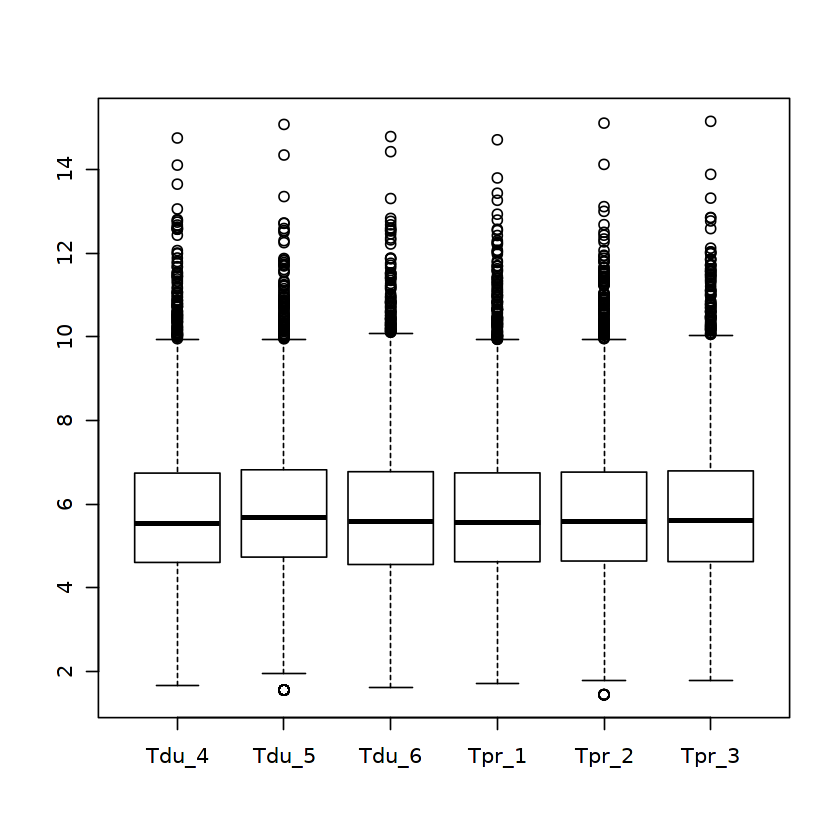

In [15]:
boxplot(cpm(d$counts + 1, log=TRUE))
# boxplot: Produce box-and-whisker plot(s) of the given (grouped) values
# log: character indicating if x or y or both coordinates should be plotted in log scale.

In [16]:
dev.off()
# This function closes the specified plot (by default the current device) and if it is an imguR device, uploads the plots for web hosting

pdf 
  3

In [17]:
trt = factor(c(1,1,1,2,2,2), labels=c("Tdu","Tpr"))
# factor: The function factor is used to encode a vector as a factor
# lables: an optional character vector of labels for the levels

In [18]:
printHead(trt)

[1] Tdu Tdu Tdu Tpr Tpr Tpr
Levels: Tdu Tpr


In [19]:
design=model.matrix(~0 + trt)
# model.matrix creates a design (or model) matrix, e.g., by expanding factors to a set of dummy variables (depending on the contrasts) and expanding interactions similarly.

In [20]:
printHead(design)

  trtTdu trtTpr
1      1      0
2      1      0
3      1      0
4      0      1
5      0      1
6      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$trt
[1] "contr.treatment"



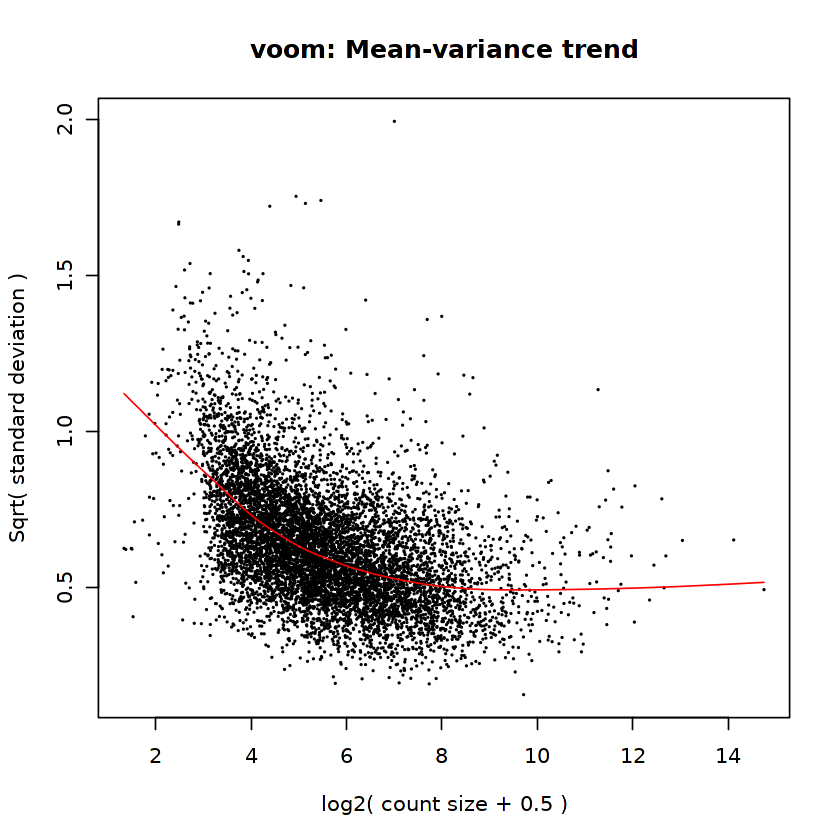

In [21]:
voom=voom(d, design, plot=TRUE)
# voom: This function is intended to process RNA-Seq or ChIP-Seq data prior to linear modelling in limma.
# The key concern is to estimate the mean-variance relationship in the data, then use this to compute appropriate weights for each observation. Count data almost show non-trivial mean-variance relationships. Raw counts show increasing variance with increasing count size, while log-counts typically show a decreasing mean-variance trend.
# Transform count data to log2-counts per million (logCPM), estimate the mean-variance relationship and use this to compute appropriate observational-level weights. The data are then ready for linear modelling.

In [22]:
write.table(voom$E, "voom_expression_values_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)
# write.table prints its required argument x to a file
# quote: If FALSE, nothing is quoted.

In [23]:
fit = lmFit(voom, design)
# lmFit: Fit linear model for each gene given a series of arrays

In [24]:
printHead(fit)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.868021 6.921940
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.617014 8.115160
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.417976 4.471854
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.725526 7.328415
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.904008 9.888140
8016 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1653764 0.1662838
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1520658 0.1477611
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.2115313 0.2682966
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1686637 0.1582574
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1407163 0.1407990
8016 more rows ...

$sigma
[1] 0.3984483 0.9336448 0.8344699 0.6838318 0.3389739
8016 

In [25]:
overall_model <- eBayes(fit)
# eBayes: Empirical Bayes Statistics For Differential Expression
# Given a microarray linear model fit, compute moderated t-statistics, moderated F-statistic, and log-odds of differential expression by empirical Bayes moderation of the standard errors towards a common value.

In [26]:
printHead(overall_model)

$coefficients
                                                       trtTdu   trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  6.868021 6.921940
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  7.617014 8.115160
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 5.417976 4.471854
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   6.725526 7.328415
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  9.904008 9.888140
8016 more rows ...

$stdev.unscaled
                                                        trtTdu    trtTpr
Tpr_TRINITY_DN11257_c2_g1|Tdu_TRINITY_DN16696_c0_g1  0.1653764 0.1662838
Tpr_TRINITY_DN10844_c2_g7|Tdu_TRINITY_DN25328_c2_g5  0.1520658 0.1477611
Tpr_TRINITY_DN15383_c4_g16|Tdu_TRINITY_DN14160_c0_g1 0.2115313 0.2682966
Tpr_TRINITY_DN1451_c0_g1|Tdu_TRINITY_DN16990_c3_g1   0.1686637 0.1582574
Tpr_TRINITY_DN10853_c1_g4|Tdu_TRINITY_DN21860_c3_g3  0.1407163 0.1407990
8016 more rows ...

$sigma
[1] 0.3984483 0.9336448 0.8344699 0.6838318 0.3389739
8016 

In [27]:
pdf("residual_std_dev.pdf")
# standard deviation (SD, also represented by the lower case Greek letter sigma σ)

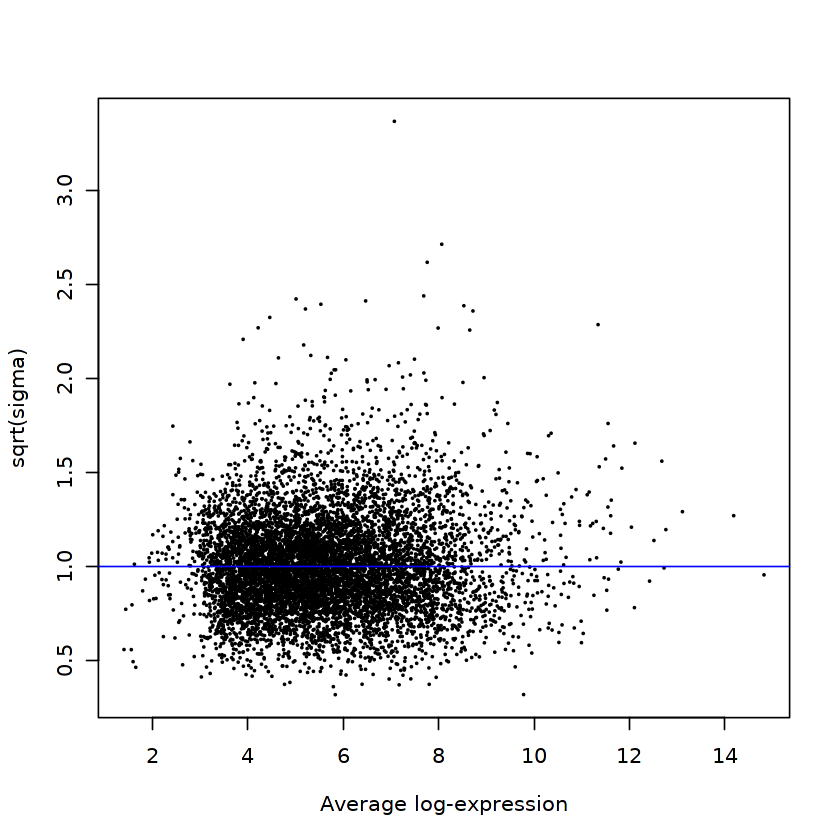

In [28]:
plotSA(overall_model)

In [29]:
dev.off()

pdf 
  3

In [30]:
topTable(overall_model, coef=ncol(design))
# topTable: Extract a table of the top-ranked genes from a linear model fit; selecting the top-ranked genes for any given contrast

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN12100_c1_g5|Tdu_TRINITY_DN21143_c2_g4,11.067803,10.994530,96.35107,2.144764e-16,1.952516e-13,25.87849
Tpr_TRINITY_DN15394_c3_g2|Tdu_TRINITY_DN15869_c0_g1,10.762480,10.522089,93.94643,2.772661e-16,1.952516e-13,25.76003
Tpr_TRINITY_DN15008_c0_g3|Tdu_TRINITY_DN22494_c7_g1,10.749067,11.031537,92.57604,3.219075e-16,1.952516e-13,25.68140
Tpr_TRINITY_DN12663_c2_g2|Tdu_TRINITY_DN16907_c0_g1,11.538940,12.104542,93.17545,3.014776e-16,1.952516e-13,25.67325
Tpr_TRINITY_DN13224_c2_g2|Tdu_TRINITY_DN21311_c1_g1,11.407060,11.525950,92.88371,3.112373e-16,1.952516e-13,25.66490
Tpr_TRINITY_DN15350_c0_g5|Tdu_TRINITY_DN16990_c3_g6,15.001733,14.819986,100.59797,1.383711e-16,1.952516e-13,25.64389
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,10.701345,10.844342,91.32025,3.698193e-16,1.952516e-13,25.60852
Tpr_TRINITY_DN13509_c0_g1|Tdu_TRINITY_DN20057_c3_g7,10.878069,10.987810,91.43453,3.651507e-16,1.952516e-13,25.60802
Tpr_TRINITY_DN11390_c1_g6|Tdu_TRINITY_DN18121_c6_g1,9.930815,9.782118,90.30479,4.143089e-16,1.952516e-13,25.56531


In [31]:
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
# Toptable output for all probes in original (unsorted) order can be obtained by topTable(fit,sort="none",n=Inf)

In [32]:
write.table(top, "DE_overall_model_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)

In [33]:
print(summary(top))
# logFC: log2-fold-change

     logFC            AveExpr             t              P.Value        
 Min.   :-0.8885   Min.   : 1.408   Min.   : -1.522   Min.   :0.000000  
 1st Qu.: 4.4503   1st Qu.: 4.431   1st Qu.: 15.457   1st Qu.:0.000000  
 Median : 5.4827   Median : 5.466   Median : 24.764   Median :0.000000  
 Mean   : 5.6540   Mean   : 5.653   Mean   : 28.390   Mean   :0.002324  
 3rd Qu.: 6.7303   3rd Qu.: 6.678   3rd Qu.: 38.212   3rd Qu.:0.000000  
 Max.   :15.0017   Max.   :14.820   Max.   :100.598   Max.   :0.951324  
   adj.P.Val              B         
 Min.   :0.000000   Min.   :-6.315  
 1st Qu.:0.000000   1st Qu.: 9.993  
 Median :0.000000   Median :14.559  
 Mean   :0.002329   Mean   :14.013  
 3rd Qu.:0.000000   3rd Qu.:18.680  
 Max.   :0.951324   Max.   :25.878  


In [34]:
contrast.matrix = makeContrasts(contrasts=c("trtTdu-trtTpr"), levels=design)
# makeContrasts: Construct the contrast matrix corresponding to specified contrasts of a set of parameters

In [35]:
fit2 = contrasts.fit(fit, contrast.matrix)
# contrasts.fit: Given a linear model fit to microarray data, compute estimated coefficients and standard errors for a given set of contrasts.

In [36]:
fit2 = eBayes(fit2)

In [37]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tdu_Tpr_min10_3rep.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN12451_c1_g4|Tdu_TRINITY_DN22402_c2_g3,-3.287525,8.590204,-17.65079,5.820340e-09,4.668495e-05,11.239478
Tpr_TRINITY_DN10564_c0_g1|Tdu_TRINITY_DN16653_c0_g1,4.406746,7.843800,15.94642,1.581565e-08,6.342865e-05,10.220431
Tpr_TRINITY_DN11618_c0_g5|Tdu_TRINITY_DN24489_c1_g3,5.726977,6.592399,15.13327,2.640428e-08,7.059625e-05,9.319599
Tpr_TRINITY_DN10835_c3_g2|Tdu_TRINITY_DN19567_c0_g4,-2.814214,6.816306,-13.28364,9.374461e-08,1.253209e-04,8.526530
Tpr_TRINITY_DN11894_c0_g1|Tdu_TRINITY_DN15151_c0_g1,3.160758,6.444613,12.78608,1.354616e-07,1.552197e-04,8.140225
Tpr_TRINITY_DN10604_c3_g3|Tdu_TRINITY_DN18047_c0_g1,2.744186,6.741590,12.47315,1.718840e-07,1.723352e-04,7.937805
Tpr_TRINITY_DN1078_c0_g1|Tdu_TRINITY_DN9793_c0_g1,-2.759289,7.005690,-11.95676,2.576543e-07,2.205279e-04,7.545851
Tpr_TRINITY_DN12160_c1_g3|Tdu_TRINITY_DN16869_c3_g1,-2.146915,7.604019,-11.30943,4.376016e-07,2.953689e-04,7.002233
Tpr_TRINITY_DN10137_c4_g1|Tdu_TRINITY_DN22038_c0_g4,-3.007912,7.203238,-11.13244,5.081170e-07,2.953689e-04,6.869718
